# **FPR2 S23 | Green Garden**
![Green Garden Logo](logo.png "Green Garden")
## **Tesorflow Object Detection Implementation**

**Rubén Martínez Sisó**<br>
**Lucía Cárdenas Palacios**<br>

---

# **Table Of Contents**
* Introduction
* Specifications
* How to execute image detection
* 1. Prepare Image Capture
* 2. Capture Images
* 3. Image Labelling
* 4. Setup Paths
* 5. Download Tensorflow Object Detection And TensorFlow Detection Model Zoo
* 6. Create TF Records
* 7. Obtain And Update Config File
* 8. Train The Model
* 9. Evaluate The Model
* 10. Load Trained Model
* 11. Image Detection
* 12. Real Time Detection
* 13. Conclusion

# **Introduction**
This programme consists of the training and testing of an artificial intelligence model for the recognition of fruit and vegetable images. It is a prototype of a software for a camera able to recognise products in real time, so that, when the customer weighs the product on a scale, the camera will automatically indicate what type of product is being weighed and the price will be calculated depending on it. All details about its utility, purpose and advantages are described in the **FPR project report**.<br>
Fruits and vegetables that the model can recognise:<br>
🍌 Banana<br>
🍎 Apple<br>
🍅 Tomato<br>
🥑 Avocado<br>
🥔 Potato<br>

# **Specifications**
The program has been developed in Python language and with Jupyter Notebook as text editor. It has also been tested with Google Colab and Visual Studio Code, but it is also compatible with other editors such as Pycharm.<br>
A Linux virtual machine (Ubuntu) was required for development, as well as using a virtual environment so that all installations are isolated and thus avoid conflicts with different libraries and dependencies.<br>
This code uses as its main tool the Tensorflow library, one of the most popular libraries for building and training machine learning and deep learning models. TensorFlow allows to build and train deep learning models in a scalable and efficient way. It provides a wide range of tools and functionalities for working with data and models, including a high-level API that facilitates the process of building and training complex models.<br>
Two models are available, "my_ssd_mobnet_final" and "my_ssd_mobnet_definitive". The first uses images of fruit and vegetables from a database, but the results are far from optimal. The second uses images taken directly with the computer camera, the results are better and it is the definitive model.

- How to activate the virtual environment:<br>
Linux:
*$source tfod/bin/activate* <br>

    Windows: 
*$.\tfod\Scripts\activate* <br>

- How to activate jupyter notebook:<br>
*$jupyter notebook* <br>

- How to activate Tensorboard and consult graphs of the results (with the virtual environment activated):<br>
*(tfod) /Tensorflow Object Detection/TFODCourse/Tensorflow/workspace/models/my_ssd_mobnet_definitive*<br>
*$tensorboard --logdir=.* <br>

- Install dependencies:<br>
*$pip install ipykernel* <br>

- Directories tree:<br>
*$tree*<br>

In [405]:
# Python packages and versions:
!pip list

Package                       Version
----------------------------- ---------
absl-py                       1.4.0
anyio                         3.6.2
apache-beam                   2.46.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arrow                         1.2.3
asttokens                     2.2.1
astunparse                    1.6.3
attrs                         22.2.0
avro-python3                  1.10.2
backcall                      0.2.0
beautifulsoup4                4.12.2
bleach                        6.0.0
cachetools                    5.3.0
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.1.0
click                         8.1.3
cloudpickle                   2.2.1
colorama                      0.4.6
comm                          0.1.3
contextlib2                   21.6.0
contourpy                     1.0.7
crcmod                        1.7
cycler      

# **How to execute image detection** <br>
The directories and files attached with this code are essential for the development of the programme. Errors due to version incompatibility or required dependencies are likely to occur if you try to run the whole program and re-train the model.

**RUNNING THE ALREADY TRAINED MODEL IN GOOGLE COLAB**<br>
**1. Create a new Google Colab notebook opening this same file (TFOD.ipynb)**<br>
**2. Create this folder structure with the following code cell (all the directories will be explained in detail later)**<br>
![Directories](directories.png "Directories")<br>

In [ ]:
#🔴 WARNING: EXCLUSIVE FOR GOOGLE COLAB

import os

CUSTOM_MODEL_NAME = 'my_ssd_mobnet_definitive' 
CustomPaths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'), 
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),   
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'TEST_PATH': os.path.join('Tensorflow', 'workspace','images','test'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME), 
}

# Create all the directories
for path in CustomPaths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}


**3. Add the following files by hand to Google Colab in the corresponding directories:**<br>
* In "images" (Tensorflow/workspace/images), create a new folder called "test" and add ALL the files from the local path Tensorflow/workspace/images/test
* In "my_sdd_mobnet_definitive" (Tensorflow/workspace/models/my_ssd_mobnet_definitive), add the files "ckpt-4.data-00000-of-00001", "ckpt-4.index" and "pipeline.config" from the local path Tensorflow/workspace/models/my_ssd_mobnet_definitive
* In "annotations" (Tensorflow/workspace/annotations), add the file "label_map.pbtxt" from the local path Tensorflow/workspace/annotations/label_map.pbtxt

**4. Run JUST the following sections of the code:**<br>
1 Prepare Image Capture<br>
4 Setup Paths<br>
5 Download Tensorflow Object Detection And TensorFlow Detection Model Zoo<br>
6 Create TF Records<br>
10 Load Trained Model<br>
11 Image Detection<br>
12 Real Time Detection<br>

* Also if there is any import error, try to restart the kernel.


## **👨‍💻 Now let's get started!**

# **1. Prepare Image Capture**
---

The first step would be to capture the images through the computer camera to be used in the model. Before doing that, it is necessary to download some dependencies.

In [1]:
# Install Opencv dependency to process images and enable artificial vision
!pip install opencv-python

You should consider upgrading via the 'C:\Users\ruben\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [337]:
# Import Opencv
import cv2

# Import time
import time

# Import Opencv. To give unique identifiers for te images
import uuid

# Import Operating System. To identify in witch OS it is working on
import os

# **2. Capture Images**
---

Now it's time to capture the images. Several pictures of the same product will be taken one after the other, and then change to the next product. Always adding waiting time to allow time to change the position, lighting or type of product.

In [338]:
# Define a list of labels to be used. In this case, the vegtables and fruits that are going to be captured
labels = ['Avocado', 'Potato', 'Tomato', 'Apple', 'Banana']

# Path to the image directory
IMAGES_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'collectedimagesvf')

In [402]:
# For each label
for label in labels:    
    
    # Connect to the webcam
    cap = cv2.VideoCapture(0)
    print('IMAGES {}'.format(label))
    
    # 5 seconds delay between lables
    time.sleep(5)
    
    # Start round. 25 images of each label
    for imgnum in range(25):
        
        # Connect to the camera and take picture
        print('Smile! Taking picture number {}'.format(imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        
        # Save picture
        cv2.imwrite(imgname, frame)
        
        # Show actual picture
        cv2.imshow('frame', frame)
        
        # 2 seconds delay between pictures
        time.sleep(2)

        # In case of error
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Finish
cap.release()
cv2.destroyAllWindows()

IMAGES Avocado
Smile! Taking picture number 0
Smile! Taking picture number 1
Smile! Taking picture number 2
Smile! Taking picture number 3
Smile! Taking picture number 4
Smile! Taking picture number 5
Smile! Taking picture number 6
Smile! Taking picture number 7
Smile! Taking picture number 8
Smile! Taking picture number 9
Smile! Taking picture number 10
Smile! Taking picture number 11
Smile! Taking picture number 12
Smile! Taking picture number 13
Smile! Taking picture number 14
Smile! Taking picture number 15
Smile! Taking picture number 16
Smile! Taking picture number 17
Smile! Taking picture number 18
Smile! Taking picture number 19
Smile! Taking picture number 20
Smile! Taking picture number 21
Smile! Taking picture number 22
Smile! Taking picture number 23
Smile! Taking picture number 24
IMAGES Potato
Smile! Taking picture number 0
Smile! Taking picture number 1
Smile! Taking picture number 2
Smile! Taking picture number 3
Smile! Taking picture number 4
Smile! Taking picture numb

# **3. Image Labelling**
---

LabelImg is an image annotation tool that simplifies the process of labelling objects and generates annotations in common formats for use in computer vision tasks. LabelImg provides an intuitive graphical user interface that allows users to draw bounding boxes around objects of interest in an image and assign corresponding labels to them.In this case, LabelImg is the tool used to label the images and define if they contain an apple, a banana... It creates a xml file that specifies the size and position of the boxes.

In [403]:
# Install pyqt5 lxml. Set of Python bindings
!pip install --upgrade pyqt5 lxml


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [352]:
# Path of LabelImg instalation
LABELIMG_PATH = os.path.join('Tensorflow', 'labelimg')

In [353]:
# Save github repository
!git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [404]:
# Operating system detection
# 'posix' means Linux and 'nt' means Windows
os.name 

'posix'

In [ ]:
# Install LabelImg
if os.name == 'posix':
    !make qt5py3
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
# Open LabelImg program
!cd {LABELIMG_PATH} && python labelImg.py

# **4. Setup Paths**
---

Now that the necessary images have been obtained and labelled, it is time to start the training and testing process of the model. Before that, some preliminary configurations and installations are necessary. In this case, certain default paths will be defined to simplify the process.

In [427]:
# Path: Tensorflow Object Detection/TFODCourse/Tensorflow/workspace/models

# Test with database images
# CUSTOM_MODEL_NAME = 'my_ssd_mobnet_final' 

# Definitive version
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_definitive' 

# Pretained model used: SSD MobileNet V2 FPNLite 320x320
# More information: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

In [430]:
# Create all the paths of the directories. This is just to simplify the code and make it easy to interpretate
paths = {
    # workspace: main directories
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),  
    # scripts: script of TF Record generation
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'), 
    # models: TF Records downloaded
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),  
    
    # annotations: TF Record files
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),   
    # images: pictures used for train and test
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'), 
    # models: diferents models of neural networks created
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    # pre-trained-models: SSD MobileNet V2 FPNLite 320x320 downloaded
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    # my_ssd_mobnet_definitive: checkpoints of the used model
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
}

In [431]:
paths

{'WORKSPACE_PATH': 'Tensorflow/workspace',
 'SCRIPTS_PATH': 'Tensorflow/scripts',
 'APIMODEL_PATH': 'Tensorflow/models',
 'ANNOTATION_PATH': 'Tensorflow/workspace/annotations',
 'IMAGE_PATH': 'Tensorflow/workspace/images',
 'MODEL_PATH': 'Tensorflow/workspace/models',
 'PRETRAINED_MODEL_PATH': 'Tensorflow/workspace/pre-trained-models',
 'CHECKPOINT_PATH': 'Tensorflow/workspace/models/my_ssd_mobnet_definitive',
 'PROTOC_PATH': 'Tensorflow/protoc'}

In [432]:
files = {
    # pipeline.config: all the configuration for training the model
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    # TF Record generator
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], 'generate_tfrecord.py'), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], 'label_map.pbtxt')
}

In [433]:
files

{'PIPELINE_CONFIG': 'Tensorflow/workspace/models/my_ssd_mobnet_definitive/pipeline.config',
 'TF_RECORD_SCRIPT': 'Tensorflow/scripts/generate_tfrecord.py',
 'LABELMAP': 'Tensorflow/workspace/annotations/label_map.pbtxt'}

# **5. Download Tensorflow Object Detection And TensorFlow Detection Model Zoo** 
---

TensorFlow Object Detection is an object detection API that provides a variety of pre-trained models, which are highly accurate and efficient in terms of speed, and tools for training and evaluating custom object detection models.<br>
TensorFlow Detection Model Zoo is a public repository maintained by the TensorFlow community that contains a large collection of pre-trained models for various machine learning tasks, in particular for object detection and classification. The idea behind Model Zoo is that developers can leverage these pre-trained models in their own projects without having to train them from scratch. This allows for a faster and more efficient transfer of learning, especially in cases where large datasets or sufficient computational resources are not available to train complex models from scratch. In addition to the pre-trained models, the TensorFlow Model Zoo also provides the scripts and tools necessary to use and adapt these models in different applications. Users can download the models, load them into TensorFlow and use them for tasks such as object detection.<br>

In this project, one of the models provided will be used to provide a training base and simplify the process.

In [434]:
# Clone Tensorflow repository. Specially interested in Object Detection API section
# More information: https://github.com/tensorflow/models/tree/master/research/object_detection
!git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

fatal: destination path 'Tensorflow/models' already exists and is not an empty directory.


In [16]:
# Install Tensorflow Object Detection (TFOD)

# Protoc are the protocol buffers or "protobuf". It is ised by TensorFlow  
# Object Detection API for defining its data structures and configurations.
# More information: https://protobuf.dev/overview/

# Linux
if os.name=='posix':
    # Install protoc
    !apt-get install protobuf-compiler
    # Install TFOD API
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
# Windows
if os.name=='nt':
    # Install protoc
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))
    # Install TFOD API
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Processing /home/ruben/Tensorflow Object Detection/TFODCourse/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Using cached apache_beam-2.46.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.8 MB)
  Using cached avro_python3-1.10.2-py3-none-any.whl
  Using cached contextlib2-21.6.0-py2.py3-none-any.whl (13 kB)
  Using cached lvis-0.5.3-py3-none-any.whl (14 kB)
  Using cached matplotlib-3.7.1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
  Using cached pandas-2.0.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached Pillow-9.5.0-cp38-cp38-manylinux_2_28_x86_64.whl (3.4 MB)
  Using cached pycocotools-2.0.6.tar.gz (24 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyp

  Using cached contourpy-1.0.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
  Using cached google_api_core-2.11.0-py3-none-any.whl (120 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl (10 kB)
  Using cached google_auth_httplib2-0.1.0-py2.py3-none-any.whl (9.3 kB)
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached python_slugify-8.0.1-py2.py3-none-any.whl (9.7 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached dm_tree-0.1.8-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (152 kB)
  Using cached scikit_learn-1.2.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Using cached array_record-0.2.0-py38-none-any.whl (3.0 MB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached tensorflow_metadata-1.13.0-py3-none-any.whl 

  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1697019 sha256=746ea4ecbef64ae9a052bff86842500b022b7c2a50b3c8a22ad71a58ea4fd0fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-g12eql5y/wheels/d7/43/58/1151c0047aa79e76dd42c68abbf618f85a735c23e1efaec226
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp38-cp38-linux_x86_64.whl size=423800 sha256=2c452c79362f9bcfc021cffe56d5953f3cc9167cf2be16ac49f66ebb26cda942
  Stored in directory: /home/ruben/.cache/pip/wheels/3e/08/ac/58126fe59992032701437336493f6132e1b72381a62d00b595
Successfully built object-detection pycocotools
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.1
    Uninstalling protobuf-4.22.1:
      Successfully uninstalled protobuf-4.22.1


In [13]:
# Protocol buffers installation
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.15.7
Uninstalling protobuf-3.15.7:
  Successfully uninstalled protobuf-3.15.7
Found existing installation: matplotlib 3.4.1
Uninstalling matplotlib-3.4.1:
  Successfully uninstalled matplotlib-3.4.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires grpcio<2,>=1.29.0, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow 2.5.0rc0 requires astunparse~=1.6.3, which is not installed.
tensorflow 2.5.0rc0 requires flatbuffers~=1.12.0, which is not installed.
tensorflow 2.5.0rc0 requires gast==0.4.0, which is not installed.
tensorflow 2.5.0rc0 requires go


  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


In [18]:
# If there is an error importing Object Detection, restart kernel
import object_detection

In [17]:
# Verify Installation
# To check if TFOD API is installed successfully
# If there is an error, just install the dependencies requiered like !pip install (...)
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
!python {VERIFICATION_SCRIPT}

2023-04-10 09:11:25.507603: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 09:11:25.672144: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-10 09:11:25.673434: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 09:11:27.447291: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/ruben/Tensorflow Object Detection/TFODCourse/tfod/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned

W0410 09:11:32.679203 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:32.684499 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:32.688460 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:32.698233 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:32.835294 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:32.838333 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:32.842534 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:32.848463 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:32.948107 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:32.951241 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:32.956334 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:32.959427 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:33.102878 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.112497 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.115557 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.120127 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:33.207499 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.210285 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.217865 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.220725 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:33.414187 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.419529 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.423947 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.430924 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:33.521800 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.528053 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.534396 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:33.537688 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:34.146883 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.151213 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.158565 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.166350 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:34.248706 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.256939 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.262302 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.268120 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:34.352217 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.356041 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.366071 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.373881 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.03s
I0410 09:11:34.615880 140683787208512 test_util.py:2467] time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.03s
[       OK ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model1 (customize_head_params=False)
W0410 09:11:34.626848 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.633155 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` s

W0410 09:11:34.773947 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.791466 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.802946 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.809378 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:34.939748 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.944254 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.952901 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:34.957923 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:35.097934 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.101691 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.105356 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.116291 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:35.303289 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.306366 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.309142 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.312854 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:35.416677 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.419354 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.426229 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.429539 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:35.516667 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.522722 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.530442 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.539329 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

W0410 09:11:35.682696 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.686069 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.698522 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0410 09:11:35.702374 140683787208512 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fut

I0410 09:11:41.861092 140683787208512 efficientnet_model.py:143] round_filter input=16 output=16
I0410 09:11:41.861356 140683787208512 efficientnet_model.py:143] round_filter input=24 output=24
I0410 09:11:42.257102 140683787208512 efficientnet_model.py:143] round_filter input=24 output=24
I0410 09:11:42.257300 140683787208512 efficientnet_model.py:143] round_filter input=40 output=40
I0410 09:11:42.533802 140683787208512 efficientnet_model.py:143] round_filter input=40 output=40
I0410 09:11:42.533954 140683787208512 efficientnet_model.py:143] round_filter input=80 output=80
I0410 09:11:42.921350 140683787208512 efficientnet_model.py:143] round_filter input=80 output=80
I0410 09:11:42.921795 140683787208512 efficientnet_model.py:143] round_filter input=112 output=112
I0410 09:11:43.300194 140683787208512 efficientnet_model.py:143] round_filter input=112 output=112
I0410 09:11:43.300438 140683787208512 efficientnet_model.py:143] round_filter input=192 output=192
I0410 09:11:43.889655 14

I0410 09:11:49.912974 140683787208512 efficientnet_model.py:143] round_filter input=112 output=120
I0410 09:11:49.913184 140683787208512 efficientnet_model.py:143] round_filter input=192 output=208
I0410 09:11:50.672728 140683787208512 efficientnet_model.py:143] round_filter input=192 output=208
I0410 09:11:50.672940 140683787208512 efficientnet_model.py:143] round_filter input=320 output=352
I0410 09:11:51.058363 140683787208512 efficientnet_model.py:143] round_filter input=1280 output=1408
I0410 09:11:51.183405 140683787208512 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

I0410 09:12:02.244385 140683787208512 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b5
I0410 09:12:02.245116 140683787208512 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 288
I0410 09:12:02.245387 140683787208512 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 7
I0410 09:12:02.248029 140683787208512 efficientnet_model.py:143] round_filter input=32 output=48
I0410 09:12:02.273180 140683787208512 efficientnet_model.py:143] round_filter input=32 output=48
I0410 09:12:02.273357 140683787208512 efficientnet_model.py:143] round_filter input=16 output=24
I0410 09:12:02.797203 140683787208512 efficientnet_model.py:143] round_filter input=16 output=24
I0410 09:12:02.797392 140683787208512 efficientnet_model.py:143] round_filter input=24 output=40
I0410 09:12:03.558869 140683787208512 efficientnet_model.py:143] round_filter input=24 output=40
I0410 09:12:03.559052 14

I0410 09:12:16.438887 140683787208512 efficientnet_model.py:143] round_filter input=16 output=32
I0410 09:12:16.439047 140683787208512 efficientnet_model.py:143] round_filter input=24 output=48
I0410 09:12:17.471011 140683787208512 efficientnet_model.py:143] round_filter input=24 output=48
I0410 09:12:17.471169 140683787208512 efficientnet_model.py:143] round_filter input=40 output=80
I0410 09:12:18.332425 140683787208512 efficientnet_model.py:143] round_filter input=40 output=80
I0410 09:12:18.332680 140683787208512 efficientnet_model.py:143] round_filter input=80 output=160
I0410 09:12:19.698039 140683787208512 efficientnet_model.py:143] round_filter input=80 output=160
I0410 09:12:19.698295 140683787208512 efficientnet_model.py:143] round_filter input=112 output=224
I0410 09:12:21.115731 140683787208512 efficientnet_model.py:143] round_filter input=112 output=224
I0410 09:12:21.115888 140683787208512 efficientnet_model.py:143] round_filter input=192 output=384
I0410 09:12:23.439715 

In [20]:
# Download model from Tensorflow Model Zoo (SSD MobileNet V2 FPNLite 320x320)
# Standar AI arquitecture ready to use. This model is already prepared to detect standar objects,
# for example a bottle, mobile phone, human... so this model is used to leveraging a technique called 
# transfer learning. THe knowledge that already knows is going to be transfer to detect custom objects,
# in this case fruits and vegetables. 

# Linux
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    # Redirect files
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

# Windows    
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    # Redirect files
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-04-10 09:13:35--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.74.48, 2a00:1450:400f:802::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.74.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  3.90MB/s    in 4.5s    

2023-04-10 09:13:40 (4.31 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-

# **6. Create TF Records**
---

Create a file format called TF Record which is available to be used to train an object detection model. TF Records are a binary file format for storing data, it helps to speed up training for the custom object detection model. It provides an optimised way of loading and pre-processing data during the training of machine learning models, resulting in faster loading and more efficient use of resources.

In [193]:
# Clone repository. It is just a file to generate the TF Record
# Cloned in /Tensorflow Object Detection/TFODCourse/Tensorflow/scripts
!git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [440]:
# Execute the file cloned.
# It creates two files (test and train) 
# in the directory /Tensorflow Object Detection/TFODCourse/Tensorflow/workspace/annotations
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# **7. Obtain And Update Config File**
---

There are diferents models in Tensorflow Model Zoo. The file 'pipeline.config' in the directory */Tensorflow Object Detection/TFODCourse/Tensorflow/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8* defines the architecture of the model. This configuration is going to be updated to be used for the training process. It defines the number of classes, the image resizer (320x320), feature structure, batch size, number of steps... This files includes the sentences "PATH_TO_BE_CONFIGURED" that is going to be modified, for example the path for the checkpoints.

In [464]:
# Define again the labels but with an id (label map)
labels = [{'name':'Avocado', 'id':1}, {'name':'Tomato', 'id':2}, {'name':'Potato', 'id':3}, {'name':'Apple', 'id':4}, {'name':'Banana', 'id':5}]

# Save all the items in label_map.pbtxt
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')
        
# Show content
f = open(files['LABELMAP'], 'r')
content = f.read()
print(content)

item { 
	name:'Avocado'
	id:1
}
item { 
	name:'Tomato'
	id:2
}
item { 
	name:'Potato'
	id:3
}
item { 
	name:'Apple'
	id:4
}
item { 
	name:'Banana'
	id:5
}



In [441]:
# Copy file from Tensorflow/workspace/pre-trained-models
# Linux
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# Windows    
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [196]:
# Necessary imports
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [442]:
# File not configured
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [445]:
# Read the file
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [446]:
# Set number of classes (number of labels, in this case 5)
pipeline_config.model.ssd.num_classes = len(labels)
# Set batch size (number of training examples used in each step of updating network weights)
pipeline_config.train_config.batch_size = 2
# Set type of checkpoint
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"

# Set all the configurations paths
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [447]:
# Write the file
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [449]:
# File configured
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

# **8. Train The Model**
---

Now it is time to train the model. The result obtained will depend on variables such as the number of repetitions of the training, so it is necessary to do different trials until an efficient and optimised trained model is obtained.

TRAIN COMMAND
- Tensorflow/models/research/object_detection/model_main_tf2.py: run model train script
- --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_definitive: model directory, where pipeline.config is located
- --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_definitive/pipeline.config: specify pipeline.config file
- --num_train_steps=4000: number of training steps

FULL COMMAND

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_definitive --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_definitive/pipeline.config --num_train_steps=4000

In [ ]:
!python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_definitive --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_definitive/pipeline.config --num_train_steps=4000

# **9. Evaluate The Model**
---

The trained model is tested to check its performance. The model is asked to predict the label of an image it has never seen (images in the test folder) and its answer is then compared with the real solution.

Similar command but it specifies the checkpoints directory.

FULL COMMAND

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_definitive --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_definitive/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet_definitive

In [ ]:
!python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_definitive --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_definitive/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet_definitive

OUTPUT<br>
 **Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.720** <br>
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.916 <br>
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.877 <br>
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000 <br>
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.814 <br>
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.686 <br>
 **Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.691** <br>
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.799 <br>
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.799 <br>
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000 <br>
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.825 <br>
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.789 <br>

Average Precision = 72%<br>
Good results!

# **10. Load Trained Model**
---

A total of 4 checkpoints have been created during the training of the model. The last checkpoint is the one with the most repetitions and therefore the most knowledge. Therefore, this checkpoint will be loaded and the images will be detected through this model.

In [450]:
# Necessary imports
# Usually you can get an error here! If it is the case, just restart kernel and run step 1 and 4 again
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [283]:
# Every checkpoint is a trained model. There are several of them because they are generated as a backup

# Bould detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)

# Choose checkpoint. Use the last one to get better results
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

# **11. Image Detection**
---

Finally, the model is ready to detect fruits and vegetables in images. In this case, we will use static images not used to train the model but very similar to these, so the results may differ depending on the image.

In [4]:
# Necessary imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Define detection function
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [ ]:
# Set up category index
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

**🔴 WARNING: EXCLUSIVE FOR GOOGLE COLAB**<br>


📷 The next two cells are used to activate the camera and capture an image directly (shapshot), so the model can be used instantly. They are not mandatory to run, there are example images that can be used for the image detection.

In [ ]:
#🔴 WARNING: EXCLUSIVE FOR GOOGLE COLAB

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='snapshot.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
#🔴 WARNING: EXCLUSIVE FOR GOOGLE COLAB

import os
import shutil
from IPython.display import Image

try:
  filename = take_photo()
  
  src_path = r"/content/snapshot.jpg"
  dst_path = r"/content/Tensorflow/workspace/images/test/snapshot.jpg"
  shutil.copy(src_path, dst_path)

  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Here are some pictures from the "test" file that can be used as examples:

In [454]:
# Instant photo (Google Colab)
snapshot = 'snapshot.jpg'

# Good examples
picture1 = 'Avocado.e64d1376-effc-11ed-a5ce-e4e7494fbc91.jpg'
picture2 = 'Apple.f00c6ef8-effd-11ed-b69b-e4e7494fbc91.jpg'
picture3 = 'Potato.fd6631db-effc-11ed-8d2f-e4e7494fbc91.jpg'
picture4 = 'Banana.fdbfb9dd-effd-11ed-abe9-e4e7494fbc91.jpg'
picture5 = 'Tomato.88ab1922-effd-11ed-86fe-e4e7494fbc91.jpg'

# Error examples
picture6 = 'Potato.0360569c-effd-11ed-ad8b-e4e7494fbc91.jpg'
picture7 = 'Potato.00635060-effd-11ed-9ae7-e4e7494fbc91.jpg'
picture8 = 'Banana.30990204-effe-11ed-98e5-e4e7494fbc91.jpg'
picture9 = 'Apple.e418f697-effd-11ed-b043-e4e7494fbc91.jpg'

## **🥑 Choose a picture to detect! Change the last variable or take another picture name from the "test" folder**

In [ ]:
# Full path: /Tensorflow Object Detection/TFODCourse/Tensorflow/workspace/images/test

imageToDetect = picture5
# imageToDetect = snapshot
# imageToDetect = picture6
# ...

In [ ]:
# Update path
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', imageToDetect)

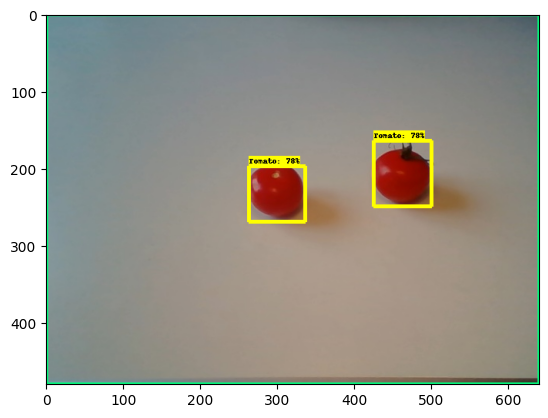

In [465]:
# Load image in python
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

# Convert it into a tensor and run detection function
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

# Detections configuration
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
label_id_offset = 1
image_np_with_detections = image_np.copy()

# Define visualization and detection of the objects
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=.7,
            line_thickness=5,
            agnostic_mode=False)

# Visualize the image
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

## **😎 Here you go!**

The output is the image itself with boxes framing the different fruits and vegetables that the model is able to recognise. It is normal for wrong answers to arise, but usually the model is successful.

# **12. Real Time Detection**
---

The model is also designed to also detect images in real time. It uses the computer camera directly and outputs immediate results.

In [461]:
# Define source of video capturation (0 is the index of the main camera of the PC)
cap = cv2.VideoCapture(0)
# Size of the visualization
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    # Convert it into a tensor and run detection function
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    # Detections configuration
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    # Define visualization and detection of the objects
    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.1,
                agnostic_mode=False)

    # Visualize video
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    # Error control
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

[ WARN:0@58103.253] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@58103.257] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


# **13. Conclusion**
---

A model has been developed that can identify and classify specific fruits and vegetables. Although the results are effective, the model can make errors depending on the image presented to it. However, at other times it is able to successfully detect and perform as expected. Therefore, favourable results have been obtained, although they could be improved with more detailed adjustments.
Nevertheless, the development of the programme has been a success and gives an idea of how the software that would implement the cameras on the garden scales would work. 😄